# Wine Quality Case Study

Prelude:
        This dataset is about "Vinho Verde" wine variant from Portugal. We are given some phsiochemical and sensory variables to determine the quality of wine.

Following are the independent variables:
1 - fixed acidity - continuous variable
2 - volatile acidity - continuous variable
3 - citric acid - continuous variable
4 - residual sugar - continuous variable
5 - chlorides - continuous variable
6 - free suphfur dioxide - continuous variable
7 - total sulphur dioxide - continuous variable
8 - density - continuous variable
9 - pH - continuous variable
10 - sulphates - continuous variable
11 - alcohol - continuous variable

Label variable :
12 - quality (score between 0 and 10)- Categorical Variable


Problem Statement:
    Based on the feature variables we need to predict what variables constitute in making a good wine.

In [81]:
# Importing necessary packages

# Importing fundamental packages
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell        ## To display multiple outputs
InteractiveShell.ast_node_interactivity = "all"
import pyforest            

## For visualization
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Data Pre-Processing Packages

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

## To create copy of data
import copy

## Pipeline Packages

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


## Ensemble Learning Algorithms Packages

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.linear_model import Ridge

## Evaluation Metrics Packages
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc

# Bagging and Boosting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier                           

# Saving the model
import pickle

In [2]:
def read(link):
    global data

    data=pd.read_csv(link)
    
    data=pd.DataFrame(data)
    print(data)

In [3]:
read(link="winequality-red.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [4]:
def eda(mydata):                                    # Defining function
    
    pd.set_option("display.max_rows", None)         # to display all rows
    pd.set_option("display.max_columns", None)       #to display all columns
    
    print(mydata.head())                              # to display first 10 records
    print("\n")                               
    print(mydata.tail())                              # to display last 10 records
    print("\n")
    print("\n")
    
    print(mydata.info())                               # to understand attributes of the data
    
    print(data.describe())                          # to get descriptive statistics
    print("\n")
    print("\n")
    print("Skewness for the data","\n",data.skew())       # to get skewness of the data, skewness=0 for normal distribution
    print("\n")
    print("Kurosis for the data","\n",data.kurtosis() )            # to get kutosis, kurtosis <=3 for normal distribution
    print("\n")
    print("\n")
    
    sns.pairplot(mydata, kind='scatter', diag_kind='kde')                       # to represent data graphically
    print("\n")
    print("\n")    
    
    plt.figure(figsize=(10,10))                      # plotting heat map to check correlation
    sns.heatmap(mydata.corr(method = "pearson"), annot = True)
    print("\n")    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

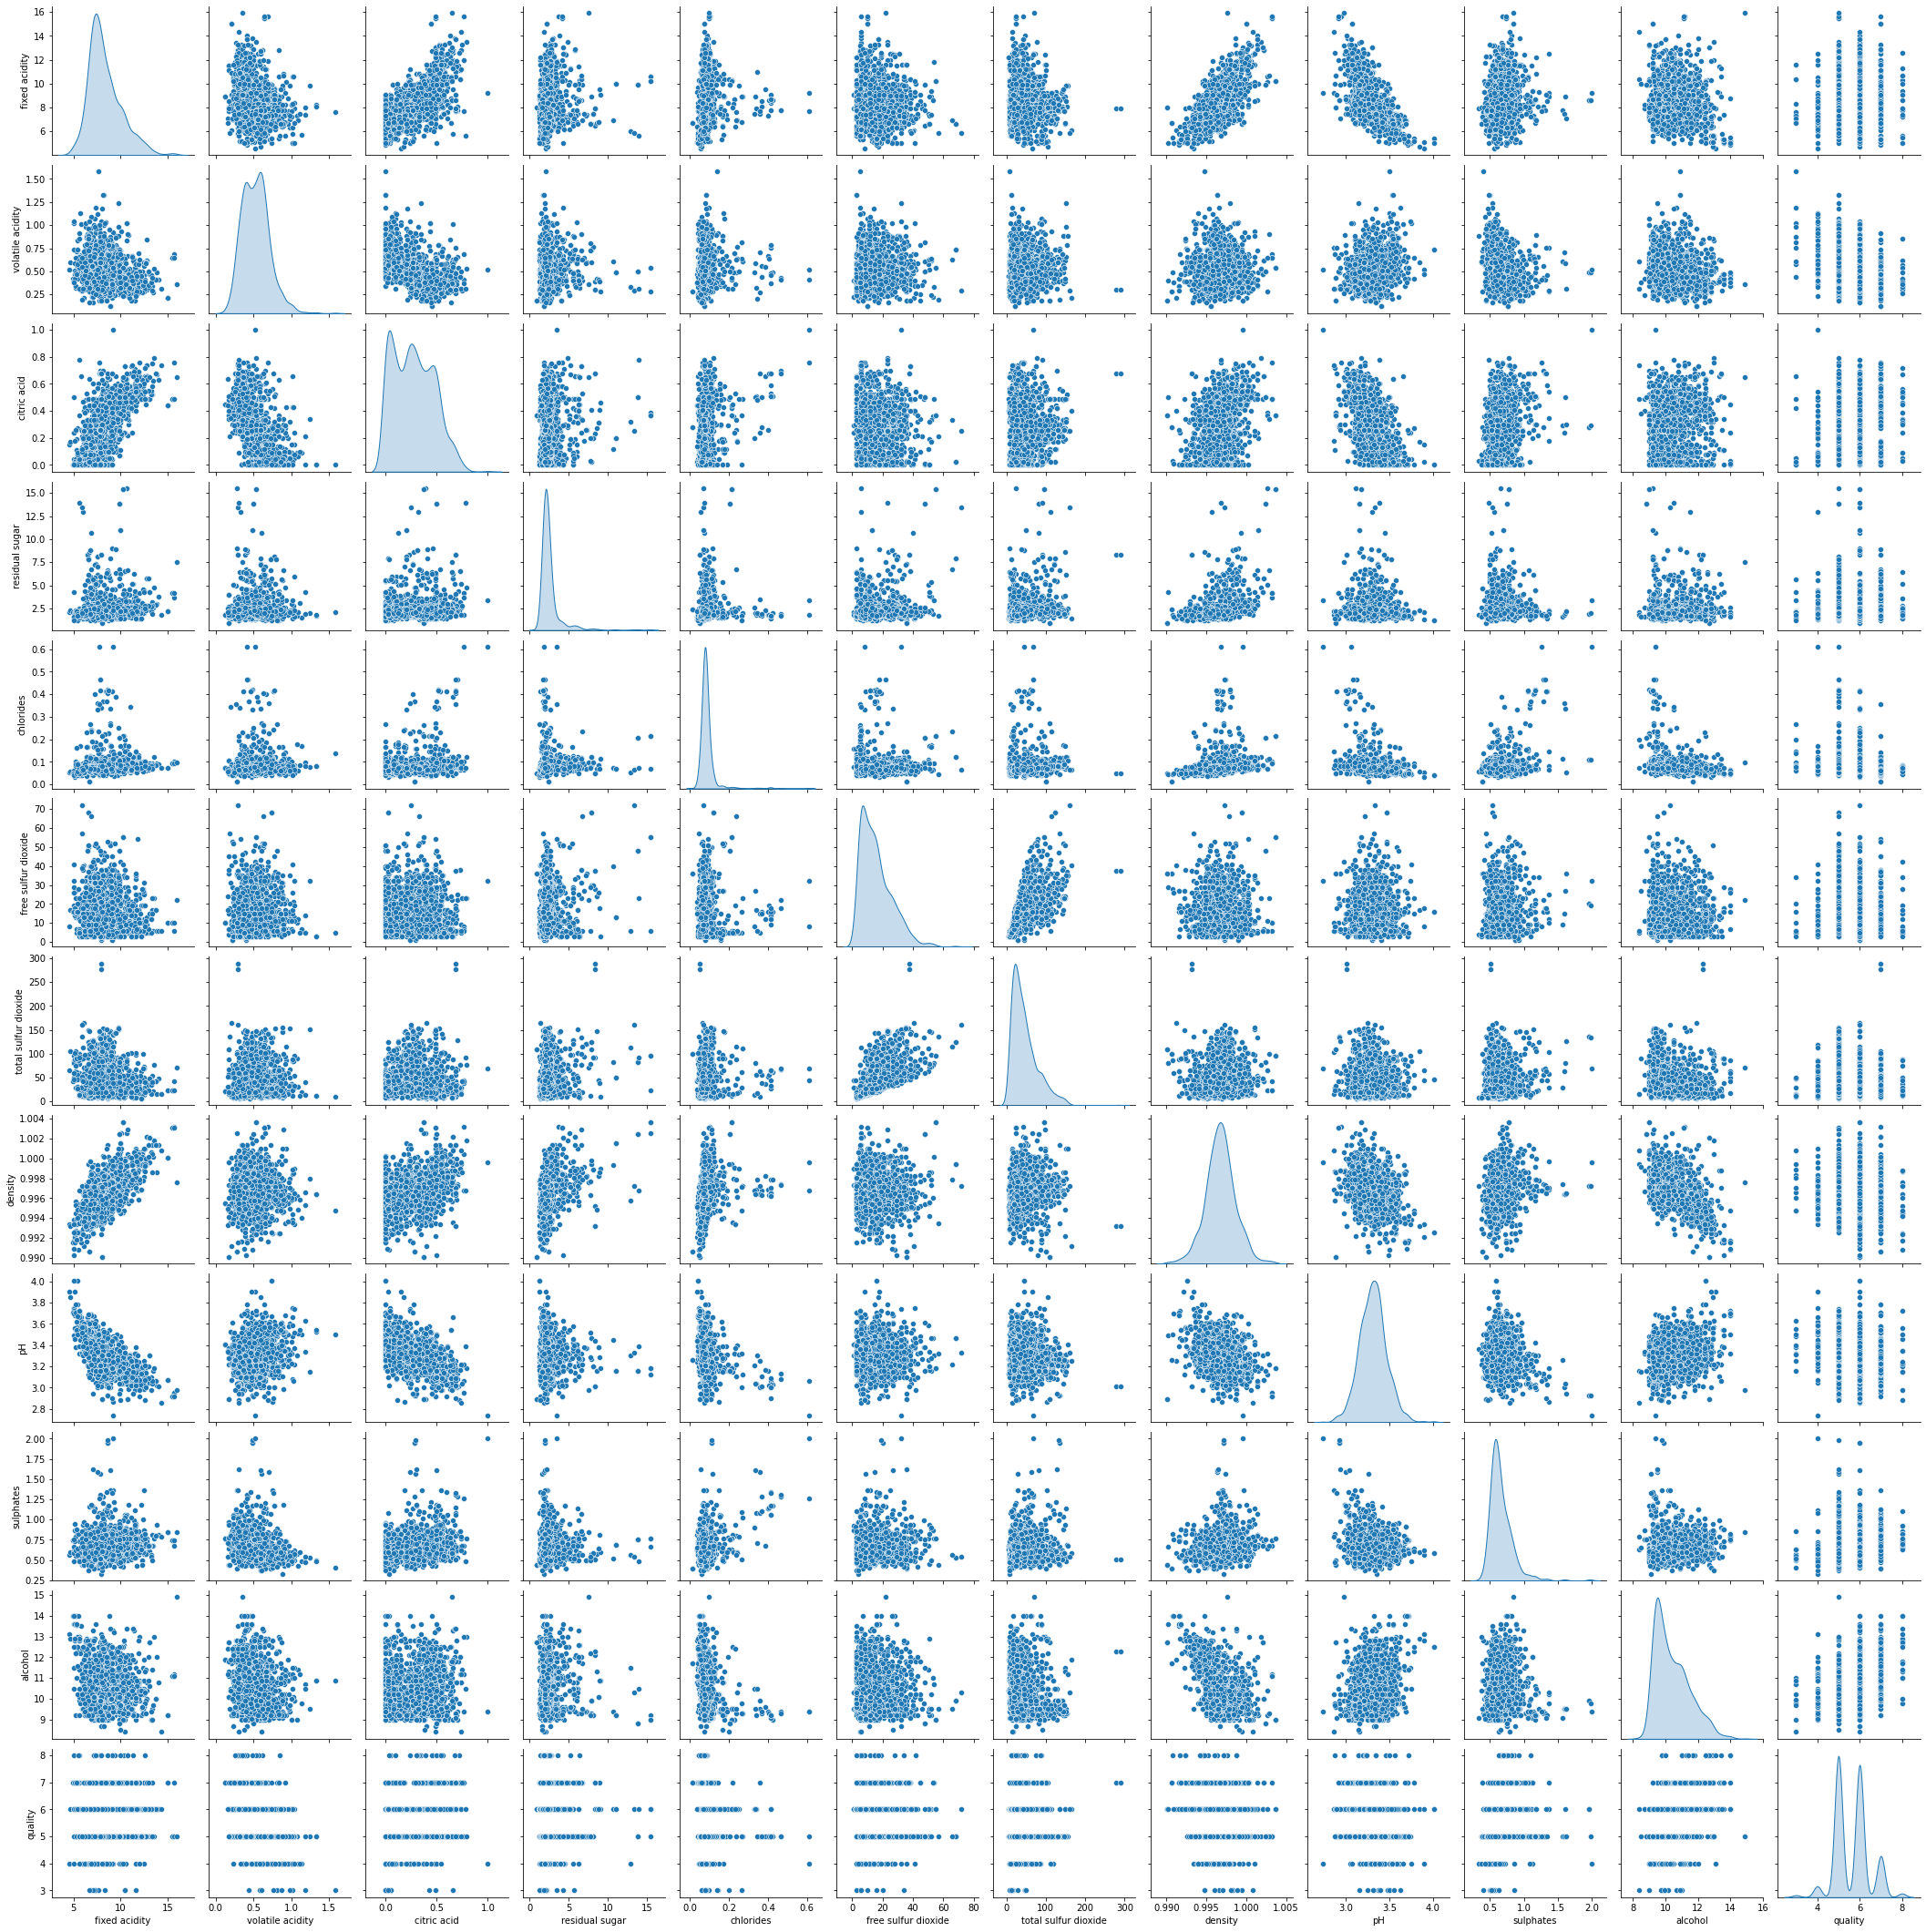

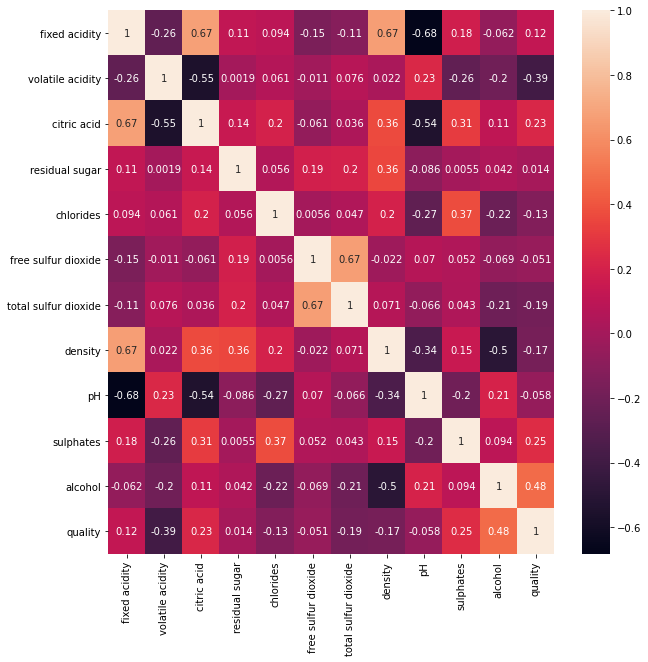

In [5]:
eda(mydata=data)

In [6]:
data["quality"].value_counts(ascending=True)

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

In [7]:
data.groupby(["quality"]).sum() ### Finding number of observations in each ring category

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                 83.6             8.845         1.71           26.35   
4                412.3            36.780         9.23          142.80   
5               5561.9           392.965       165.95         1722.15   
6               5325.5           317.395       174.70         1580.45   
7               1765.6            80.380        74.66          541.40   
8                154.2             7.620         7.04           46.40   

         chlorides  free sulfur dioxide  total sulfur dioxide    density  \
quality                                                                    
3            1.225                110.0                 249.0    9.97464   
4            4.806                650.0                1921.0   52.81675   
5           63.153              11566.0               38486.0  679.02757   
6           54.202              10024.0               26075.0  635.84041   
7           15.241               2795.0                6969.0  198.22475   
8            1.232                239.0                 602.0   17.91382   

              pH  sulphates      alcohol  
quality                                   
3          33.98       5.70    99.550000  
4         179.22      31.61   544.050000  
5        2250.67     422.88  6741.700000  
6        2116.93     430.86  6781.633333  
7         654.86     147.51  2281.716667  
8          58.81      13.82   217.700000

In [8]:
data.groupby(["quality"]).describe().transpose() ### Five point summary grouped by "quality"

quality                             3           4           5           6  \
fixed acidity        count  10.000000   53.000000  681.000000  638.000000   
                     mean    8.360000    7.779245    8.167254    8.347179   
                     std     1.770875    1.626624    1.563988    1.797849   
                     min     6.700000    4.600000    5.000000    4.700000   
                     25%     7.150000    6.800000    7.100000    7.000000   
                     50%     7.500000    7.500000    7.800000    7.900000   
                     75%     9.875000    8.400000    8.900000    9.400000   
                     max    11.600000   12.500000   15.900000   14.300000   
volatile acidity     count  10.000000   53.000000  681.000000  638.000000   
                     mean    0.884500    0.693962    0.577041    0.497484   
                     std     0.331256    0.220110    0.164801    0.160962   
                     min     0.440000    0.230000    0.180000    0.160000   
                     25%     0.647500    0.530000    0.460000    0.380000   
                     50%     0.845000    0.670000    0.580000    0.490000   
                     75%     1.010000    0.870000    0.670000    0.600000   
                     max     1.580000    1.130000    1.330000    1.040000   
citric acid          count  10.000000   53.000000  681.000000  638.000000   
                     mean    0.171000    0.174151    0.243686    0.273824   
                     std     0.250664    0.201030    0.180003    0.195108   
                     min     0.000000    0.000000    0.000000    0.000000   
                     25%     0.005000    0.030000    0.090000    0.090000   
                     50%     0.035000    0.090000    0.230000    0.260000   
                     75%     0.327500    0.270000    0.360000    0.430000   
                     max     0.660000    1.000000    0.790000    0.780000   
residual sugar       count  10.000000   53.000000  681.000000  638.000000   
                     mean    2.635000    2.694340    2.528855    2.477194   
                     std     1.401596    1.789436    1.359753    1.441576   
                     min     1.200000    1.300000    1.200000    0.900000   
                     25%     1.875000    1.900000    1.900000    1.900000   
                     50%     2.100000    2.100000    2.200000    2.200000   
                     75%     3.100000    2.800000    2.600000    2.500000   
                     max     5.700000   12.900000   15.500000   15.400000   
chlorides            count  10.000000   53.000000  681.000000  638.000000   
                     mean    0.122500    0.090679    0.092736    0.084956   
                     std     0.066241    0.076192    0.053707    0.039563   
                     min     0.061000    0.045000    0.039000    0.034000   
                     25%     0.079000    0.067000    0.074000    0.068250   
                     50%     0.090500    0.080000    0.081000    0.078000   
                     75%     0.143000    0.089000    0.094000    0.088000   
                     max     0.267000    0.610000    0.611000    0.415000   
free sulfur dioxide  count  10.000000   53.000000  681.000000  638.000000   
                     mean   11.000000   12.264151   16.983847   15.711599   
                     std     9.763879    9.025926   10.955446    9.940911   
                     min     3.000000    3.000000    3.000000    1.000000   
                     25%     5.000000    6.000000    9.000000    8.000000   
                     50%     6.000000   11.000000   15.000000   14.000000   
                     75%    14.500000   15.000000   23.000000   21.000000   
                     max    34.000000   41.000000   68.000000   72.000000   
total sulfur dioxide count  10.000000   53.000000  681.000000  638.000000   
                     mean   24.900000   36.245283   56.513950   40.869906   
                     std    16.828877   27.583374   36.993116   25.038250

In [9]:
data.groupby(["quality", "alcohol"]).describe() ### Five point summary grouped by "quality & alcohol"

fixed acidity                                            \
                          count       mean       std   min     25%    50%   
quality alcohol                                                             
3       8.400000            1.0  10.400000       NaN  10.4  10.400  10.40   
        9.000000            1.0  11.600000       NaN  11.6  11.600  11.60   
        9.700000            1.0   7.300000       NaN   7.3   7.300   7.30   
        9.800000            1.0   6.800000       NaN   6.8   6.800   6.80   
        9.900000            1.0  10.400000       NaN  10.4  10.400  10.40   
        9.950000            1.0   6.700000       NaN   6.7   6.700   6.70   
        10.200000           1.0   7.100000       NaN   7.1   7.100   7.10   
        10.700000           1.0   7.400000       NaN   7.4   7.400   7.40   
        10.900000           1.0   7.600000       NaN   7.6   7.600   7.60   
        11.000000           1.0   8.300000       NaN   8.3   8.300   8.30   
4       9.000000            2.0   7.350000  0.070711   7.3   7.325   7.35   
        9.050000            1.0   6.900000       NaN   6.9   6.900   6.90   
        9.100000            2.0   8.100000  0.282843   7.9   8.000   8.10   
        9.200000            3.0   8.100000  0.435890   7.6   7.950   8.30   
        9.300000            2.0   9.500000  0.989949   8.8   9.150   9.50   
        9.400000            2.0   8.100000  1.555635   7.0   7.550   8.10   
        9.600000            6.0   9.266667  1.887503   7.5   8.125   8.50   
        9.700000            2.0   8.300000  1.131371   7.5   7.900   8.30   
        9.800000            3.0   7.266667  1.357694   5.7   6.850   8.00   
        9.900000            1.0  11.600000       NaN  11.6  11.600  11.60   
        10.000000           4.0   7.900000  1.564182   6.2   7.025   7.75   
        10.100000           1.0   5.600000       NaN   5.6   5.600   5.60   
        10.300000           1.0   7.200000       NaN   7.2   7.200   7.20   
        10.400000           3.0   9.000000  2.749545   6.6   7.500   8.40   
        10.500000           1.0   5.000000       NaN   5.0   5.000   5.00   
        10.900000           3.0   7.133333  0.351188   6.8   6.950   7.10   
        11.000000           4.0   7.125000  0.834166   6.4   6.625   6.90   
        11.100000           1.0   6.800000       NaN   6.8   6.800   6.80   
        11.200000           3.0   6.766667  0.642910   6.3   6.400   6.50   
        11.300000           1.0  10.100000       NaN  10.1  10.100  10.10   
        11.400000           2.0   6.900000  0.000000   6.9   6.900   6.90   
        11.500000           2.0   6.250000  0.353553   6.0   6.125   6.25   
        11.800000           1.0   6.500000       NaN   6.5   6.500   6.50   
        12.000000           1.0   8.500000       NaN   8.5   8.500   8.50   
        13.100000           1.0   4.600000       NaN   4.6   4.600   4.60   
5       8.500000            1.0  10.000000       NaN  10.0  10.000  10.00   
        8.800000            2.0   9.900000  0.000000   9.9   9.900   9.90   
        9.000000           11.0   8.663636  1.872043   7.0   7.550   8.00   
        9.100000           14.0   7.992857  0.610755   7.1   7.600   7.75   
        9.200000           50.0   7.920000  1.298665   5.2   7.050   7.70   
        9.300000           44.0   7.911364  1.010921   6.2   7.275   7.75   
        9.400000           79.0   8.318987  1.201183   6.1   7.400   8.10   
        9.500000           97.0   8.102062  1.334945   5.9   7.200   7.80   
        9.550000            1.0   8.700000       NaN   8.7   8.700   8.70   
        9.600000           38.0   8.742105  1.431996   6.8   7.525   8.55   
        9.700000           35.0   8.068571  1.096457   6.7   7.200   7.70   
        9.800000           49.0   7.787755  1.036547   6.2   7.100   7.60   
        9.900000           25.0   7.996000  1.521370   5.6   7.000   7.80   
        10.000000          29.0   8.417241  1.476257   5.8   7.400   8.20   
        10.100

In [10]:
def outlier(mydata):
    for i in mydata.columns:
        fig = px.box(mydata, y= i, width=600, height=400, title=i, template="plotly_dark")
        fig.show()

In [11]:
outlier(mydata=data.drop(["quality"],axis=1))

In [12]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [13]:
calc_vif(data.drop(["quality"],axis=1))

<IPython.core.display.Javascript object>

variables          VIF
0          fixed acidity    74.452265
1       volatile acidity    17.060026
2            citric acid     9.183495
3         residual sugar     4.662992
4              chlorides     6.554877
5    free sulfur dioxide     6.442682
6   total sulfur dioxide     6.519699
7                density  1479.287209
8                     pH  1070.967685
9              sulphates    21.590621
10               alcohol   124.394866

In [14]:
## Histogram for all the variables using plotly_express by 'quality'

for i in data.columns:
    fig = px.histogram(data, x= i, histfunc = "count", color = "quality", 
                       width=1000, height=800, title = "Histogram for " + i, 
                       template="plotly_dark")

    fig.show() 

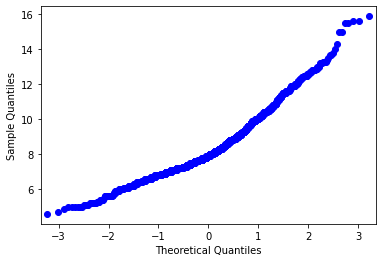

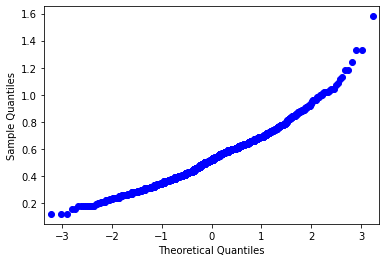

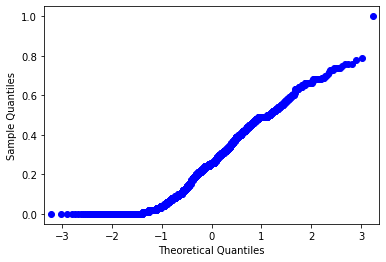

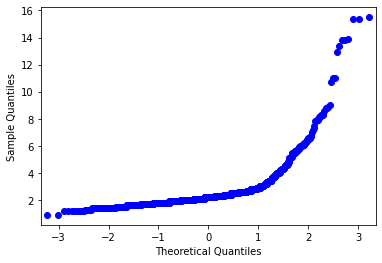

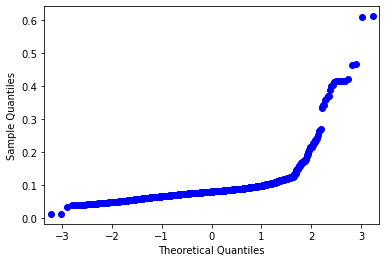

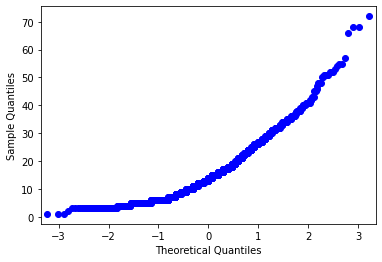

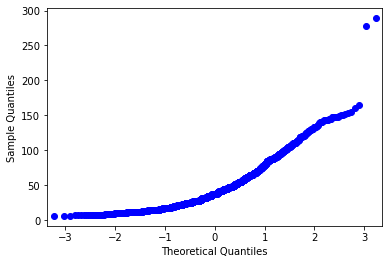

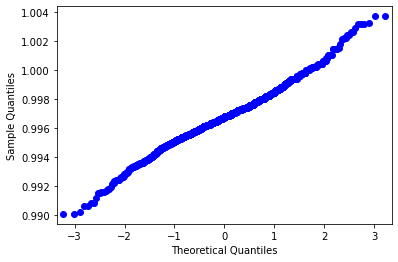

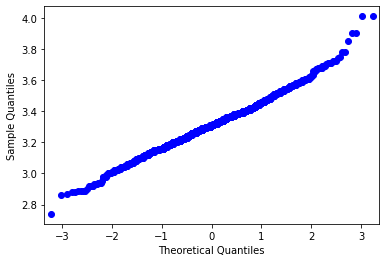

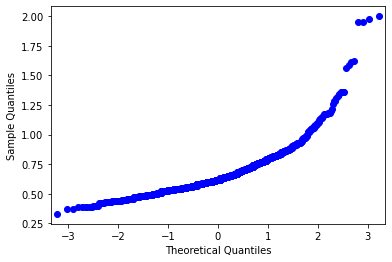

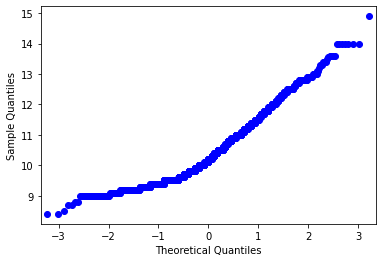

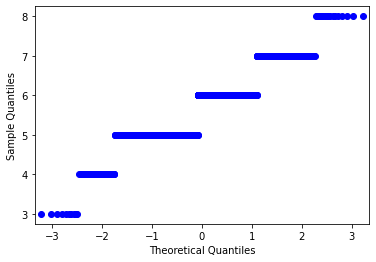

In [15]:
# Plotting qq plot

for i in data.columns:
    fig = sm.qqplot(data[i])

    fig.show() 
    

In [16]:
# Percntage of quality found in wine
percentage=(data['quality'].value_counts())*100 / (len(data['quality']))
print(percentage.sort_values(ascending=False))

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64


1. There are no mimssing values

2. There are 12 columns and  1599 rows

3. There are all numeric variables

4. Descriptive Statistics for the following variables:

a. fixed acidity:
    min: 4.6
    max: 15.9
    iqr: 2.1
    mean: 8.319637
    counts: 1599
    skewness: 0.982751
    kurtosis: 1.132143
    standard deviation: 1.741096
    
b. volatile acidity:
    min: 0.12
    max: 1.58
    iqr: 0.25
    mean: 0.527821
    counts: 1599
    skewness: 0.671593
    kurtosis: 1.225542
    standard deviation: 0.179060

c. citric acid: 
    min: 0
    max: 1
    iqr: 0.33
    mean: 0.270976
    counts: 1599
    skewness: 0.318337
    kurtosis: -0.788998
    standard deviation: 0.194801 
    
d. residual sugar:
    min: 0.9
    max: 15.5
    iqr: 0.7
    mean: 2.538806
    counts: 1599
    skewness: 4.540655
    kurtosis: 28.617595
    standard deviation: 1.409928
    
e. chlorides:
    min: 0.012
    max: 0.611
    iqr: 0.078
    mean: 0.087467
    counts: 1599
    skewness: 5.680347
    kurtosis: 41.715787
    standard deviation: 0.047065
    
f. free sulfur dioxide:
    min: 1
    max: 72
    iqr: 14
    mean: 15.874922
    counts: 1599
    skewness: 1.250567
    kurtosis: 2.023562
    standard deviation: 10.460157 
    
g. total sulfur dioxide:
    min: 6
    max: 289
    iqr: 40
    mean: 46.467792
    counts: 1599
    skewness: 1.515531
    kurtosis: 3.809824
    standard deviation: 32.895324
    
h. density:
    min: 0.990070 
    max: 1.003690
    iqr: 0.002235
    mean: 0.996747
    counts: 1599
    skewness: 0.071288
    kurtosis: 0.934079
    standard deviation: 0.001887
    
    
i. pH:
    min: 2.74
    max: 4.01
    iqr: 0.19
    mean: 3.311113
    counts: 1599
    skewness: 0.193683
    kurtosis: 0.806943
    standard deviation: 0.154386
    
j. sulphates:
    min: 0.33
    max: 2
    iqr: 0.18
    mean: 0.658149
    counts: 1599
    skewness: 2.428672
    kurtosis: 11.720251
    standard deviation:  0.169507
    
k. alcohol:
    min: 8.4
    max: 14.9
    iqr: 1.6
    mean: 10.422983
    counts: 1599
    skewness: 0.860829
    kurtosis: 0.200029
    standard deviation: 1.065668
    
l. quality:
    min: 3
    max: 8
    iqr: 1
    mean: 5.636023
    counts: 1599
    skewness: 0.217802
    kurtosis: 0.296708
    standard deviation: 0.807569

5. Citric Acid being minimum "0" means there in some wines no citric acid is used

6. Pair plot and heatmap shows no issue of multi-collinearity

7. We even find outliers in all the variables   
   
8. Wine with rating 5 is most common followed by rating 6 which is poor

9. We need to process the data for better analysis

    
    

Making a copy of the data

In [17]:
data_1= copy.deepcopy(data)

Data Cleaning

I. Encoding Quality Variable

Converting wine quality to binary '0' being less than 7 and poor.

In [18]:
def convert(val):
    if val >= 7:
        return 1
    else:
        return 0

In [19]:
data_1['quality'] = data['quality'].apply(convert)

II. Outlier treatment

In [20]:
q1 = data_1.quantile(.25)    # first quartile
q3 = data_1.quantile(.75)    # third quartile
iqr = q3 - q1


print(iqr)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  0.000000
dtype: float64


In [21]:
for i in data_1.drop(['quality'],axis=1).columns:
    data_1[i] = np.where(data_1[i] > (data_1[i].quantile(0.75) + (data_1[i].quantile(0.75) - data_1[i].quantile(0.25))*1.5),
                           (data_1[i].quantile(0.75) + (data_1[i].quantile(0.75) - data_1[i].quantile(0.25))*1.5),
                          np.where(data_1[i] < (data_1[i].quantile(0.25) - (data_1[i].quantile(0.75) - data_1[i].quantile(0.25))*1.5),
                           (data_1[i].quantile(0.25) - (data_1[i].quantile(0.75) - data_1[i].quantile(0.25))*1.5),data_1[i]))
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
outlier(mydata=data_1.drop(["quality"],axis=1)) 

III. Splitting data into train and test

In [23]:
def split (data,target):
    data_reset_index = data.reset_index(drop=True)
# Data split
    global x
    global y
    global x_train
    global y_train
    global x_test
    global y_test
# Segregate Feature & Target Variables
    x = data_reset_index.drop(target, axis=1)
    y = data_reset_index[target]
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=3)
    
    print(x_train.info())
    ("\n")
    print(x_test.info())
    ("\n")
    print(y_train.shape)
    ("\n")
    print(y_test.shape)
    ("\n")

In [24]:
split(data=data_1,
      target="quality")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 1266 to 1273
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1119 non-null   float64
 1   volatile acidity      1119 non-null   float64
 2   citric acid           1119 non-null   float64
 3   residual sugar        1119 non-null   float64
 4   chlorides             1119 non-null   float64
 5   free sulfur dioxide   1119 non-null   float64
 6   total sulfur dioxide  1119 non-null   float64
 7   density               1119 non-null   float64
 8   pH                    1119 non-null   float64
 9   sulphates             1119 non-null   float64
 10  alcohol               1119 non-null   float64
dtypes: float64(11)
memory usage: 104.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 147 to 957
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------          

SMOTE: Oversampling

In [25]:
sm = SMOTE(random_state = 5)

columns = x_train.columns

train_data = pd.concat([x_train,y_train], axis = 1)

train_data.head()



<IPython.core.display.Javascript object>

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1266            7.2              0.57         0.05            2.30      0.081   
97              7.0              0.50         0.25            2.00      0.070   
283             8.9              0.40         0.32            3.65      0.087   
778             8.3              0.43         0.30            3.40      0.079   
584            11.8              0.33         0.49            3.40      0.093   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1266                 16.0                  36.0  0.99564  3.38       0.60   
97                    3.0                  22.0  0.99630  3.25       0.63   
283                  10.0                  47.0  0.99910  3.38       0.77   
778                   7.0                  34.0  0.99788  3.36       0.61   
584                  42.0                  80.0  1.00020  3.30       0.76   

      alcohol  quality  
1266     10.3        0  
97        9.2        0  
283      10.5        1  
778      10.5        0  
584      10.7        1

In [26]:
x_os_train, y_os_train  = sm.fit_resample(train_data.drop('quality', axis = 1), train_data['quality'])

In [27]:
x_os_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.2              0.57         0.05            2.30      0.081   
1            7.0              0.50         0.25            2.00      0.070   
2            8.9              0.40         0.32            3.65      0.087   
3            8.3              0.43         0.30            3.40      0.079   
4           11.8              0.33         0.49            3.40      0.093   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 16.0                  36.0  0.99564  3.38       0.60   
1                  3.0                  22.0  0.99630  3.25       0.63   
2                 10.0                  47.0  0.99910  3.38       0.77   
3                  7.0                  34.0  0.99788  3.36       0.61   
4                 42.0                  80.0  1.00020  3.30       0.76   

   alcohol  
0     10.3  
1      9.2  
2     10.5  
3     10.5  
4     10.7

In [28]:
y_os_train.head()

0    0
1    0
2    1
3    0
4    1
Name: quality, dtype: int64

In [29]:
y_os_train.value_counts()

0    965
1    965
Name: quality, dtype: int64

In [30]:
## Number of records in Oversampled Train dataset

print('the number of records in x_os_train :', len(x_os_train))
print('the number of records in y_os_train :', len(y_os_train))
print('the number of records in x_test :', len(x_test))
print('the number of records in y_test :', len(y_test))

# Target Class Distribution for Train and test Dataset

print('the ratio of 0 and 1 in y_os_train:')

print(y_os_train.value_counts(normalize = True)*100)

print('the ratio of 0 and 1 in y_test:')

print(y_test.value_counts(normalize = True)*100)

the number of records in x_os_train : 1930
the number of records in y_os_train : 1930
the number of records in x_test : 480
the number of records in y_test : 480
the ratio of 0 and 1 in y_os_train:
0    50.0
1    50.0
Name: quality, dtype: float64
the ratio of 0 and 1 in y_test:
0    86.875
1    13.125
Name: quality, dtype: float64


IV. Scaling

As there is peakedness in the data we need to scale the data

In [31]:
scale_1= StandardScaler()
scale_2= MinMaxScaler()
scale_3= RobustScaler()


In [32]:
model= LinearRegression()

<IPython.core.display.Javascript object>

In [33]:
pipe1 = Pipeline([
    ('Scale',scale_1),
    ('model',model),
])    
pipe2 = Pipeline([
    ('Scale',scale_2),
    ('model',model),
])
pipe3 = Pipeline([
    ('Scale',scale_3),
    ('model',model),  
    
])

In [34]:
# Create Function Name 
def pre_process(data, pipe):

# Pipe.fit, pipe.predict and accuracy
    
    pipe.fit(x_os_train,y_os_train)
    
    y_pred = pipe.predict(x_test)
    
    score = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
    
    return score

In [35]:
pre_process(data= data_1,
           pipe= pipe1)

<IPython.core.display.Javascript object>

0.37904746460193145

In [36]:
pre_process(data= data_1,
           pipe= pipe2)

<IPython.core.display.Javascript object>

0.3790474646019314

In [37]:
pre_process(data= data_1,
           pipe= pipe3)

<IPython.core.display.Javascript object>

0.3790474646019315

Here we see all techniques are providing same score. We can use standard scaler.

In [38]:
scalar= StandardScaler()
scalar.fit(x_train)
x_trainsc =  scalar.transform(x_os_train)
x_testsc  =  scalar.transform(x_test)


StandardScaler()

PCA

In [39]:
pca = PCA(n_components = 0.5)
pca.fit(x_trainsc)
x_train_model = pca.transform(x_trainsc)
x_test_model = pca.transform(x_testsc)
ex_variance=np.var(x_train_model,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)

print("shape of x_train_pca", x_train_model.shape)
print('')    
print("Explained Variance Ratio for Training Dataset: \n", ex_variance_ratio)

print(" ")

ex_variance_1 = np.var(x_test_model , axis=0)
ex_variance_ratio_1 = ex_variance_1 / np.sum(ex_variance_1)
    
print("Explained Variance Ratio for Test Dataset: \n", ex_variance_ratio_1) 
print(" ")

PCA(n_components=0.5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

shape of x_train_pca (1930, 2)

Explained Variance Ratio for Training Dataset: 
 [0.62191145 0.37808855]
 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Explained Variance Ratio for Test Dataset: 
 [0.59648093 0.40351907]
 


# Model Building

### Naive Baye's Model

In [40]:
nb_model          =      GaussianNB()

## Model.fit

nb_model.fit(x_trainsc, y_os_train)

## Model.predict


y_pred_nb_0 = nb_model.predict(x_testsc)

### Naive Bayes

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb_0, labels=[0, 1])

df_cmatrix_nb = pd.DataFrame(conf_matrix_nb, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_nb = px.imshow(df_cmatrix_nb , title = "Confusion Matrix for NB Classifier Model")

## Saving the Classification Reports : precision, recall, f1-score ##


pred_report_nb = classification_report(y_test, y_pred_nb_0 , digits=2)

### NB Classifier

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,  y_pred_nb_0)
roc_nb = auc(false_positive_rate, true_positive_rate)


print("The Accuracy Score For The NB Classifier Model Is :  ", accuracy_score(y_test, y_pred_nb_0))
print("\n")
print("The roc_auc score for NB Classifier Model:  ", roc_nb)



##  Confusion Matrices 


fig_cmatrix_nb.show()

### Classification Reports 

print("Title : The Classification Report for NB Classifier Model: \n  ", pred_report_nb)


GaussianNB()

<IPython.core.display.Javascript object>

The Accuracy Score For The NB Classifier Model Is :   0.7895833333333333


The roc_auc score for NB Classifier Model:   0.7576224734498116


Title : The Classification Report for NB Classifier Model: 
                 precision    recall  f1-score   support

           0       0.95      0.80      0.87       417
           1       0.35      0.71      0.47        63

    accuracy                           0.79       480
   macro avg       0.65      0.76      0.67       480
weighted avg       0.87      0.79      0.82       480



In [56]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(nb_model , x_trainsc , y_os_train, scoring = 'accuracy', 
                                          cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_pred_nb_0)

print("The Cross Validation Score For Baseline Support Vector Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: \n", accuracy)

<IPython.core.display.Javascript object>

The Cross Validation Score For Baseline Support Vector Classifier Model After Fold Cross Validation Is :  
 [0.72020725 0.8238342  0.76683938 0.7357513  0.78238342 0.78238342
 0.87046632 0.85492228 0.84455959 0.77202073]
 
The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: 
 0.7895833333333333


### Linear Discriminant Analysis

In [41]:
# Training the model
lda_model         =      LinearDiscriminantAnalysis()

## Model.fit

lda_model.fit(x_trainsc, y_os_train)

## Model.predict

y_lda_0 = lda_model.predict(x_testsc)

## Linear Discriminant Analysis Model


conf_matrix_lda =  confusion_matrix(y_test, y_lda_0 , labels=[0, 1])

df_cmatrix_lda   = pd.DataFrame(conf_matrix_lda , index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_lda = px.imshow(df_cmatrix_lda , title = "Confusion Matrix for Baseline Linear Discriminant Analysis Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_lda = classification_report(y_test, y_lda_0 , digits=2)

### Saving the ROC_AUC Scores for Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_lda_0)
roc_lda = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The Linear Discriminant Analysis Model Is :  ",   
      accuracy_score(y_test, y_lda_0))

##  Confusion Matrices 

fig_cmatrix_lda.show()

### Classification Reports 

print("Title : The Classification Report for Linear Discriminant Model: \n  ", pred_report_lda)

###  roc_auc scores 

print("The roc_auc score for Linear Discriminat Analysis Model:  ", roc_lda)



LinearDiscriminantAnalysis()

<IPython.core.display.Javascript object>

The Accuracy Score For The Linear Discriminant Analysis Model Is :   0.80625


Title : The Classification Report for Linear Discriminant Model: 
                 precision    recall  f1-score   support

           0       0.97      0.80      0.88       417
           1       0.39      0.83      0.53        63

    accuracy                           0.81       480
   macro avg       0.68      0.81      0.70       480
weighted avg       0.89      0.81      0.83       480

The roc_auc score for Linear Discriminat Analysis Model:   0.8143770697727531


In [58]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(lda_model , x_trainsc , y_os_train, scoring = 'accuracy', 
                                          cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_lda_0)

print("The Cross Validation Score For Baseline Support Vector Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: \n", accuracy)

<IPython.core.display.Javascript object>

The Cross Validation Score For Baseline Support Vector Classifier Model After Fold Cross Validation Is :  
 [0.70466321 0.83419689 0.75129534 0.72020725 0.76165803 0.8134715
 0.88082902 0.84455959 0.83419689 0.80829016]
 
The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: 
 0.80625


### Quadratic Discriminant Model

In [42]:
# Training the Model

qda_model         =      QuadraticDiscriminantAnalysis()

## Model.fit

qda_model.fit(x_trainsc, y_os_train)

## Model.predict

y_qda_0 = qda_model.predict(x_testsc)

## Quadratic Discriminant Analysis Model

conf_matrix_qda = confusion_matrix(y_test, y_qda_0 , labels=[0, 1])

df_cmatrix_qda = pd.DataFrame(conf_matrix_qda, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_qda = px.imshow(df_cmatrix_qda , title = "Confusion Matrix for Baseline Quadratic Discriminant Analysis Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_qda = classification_report(y_test, y_qda_0 , digits=2)

### Saving the ROC_AUC Scores for Baseline Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_qda_0)
roc_qda = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The Quadratic inear Discriminant Analysis Model Is :  ",   
      accuracy_score(y_test, y_qda_0))

##  Confusion Matrices 

fig_cmatrix_qda.show()

### Classification Reports 

print("Title : The Classification Report for Quadratic Discriminant Model: \n ", pred_report_qda)

###  roc_auc scores 

print("The roc_auc score for Baseline Quadratic Discriminat Analysis Model:  ", roc_qda)

QuadraticDiscriminantAnalysis()

<IPython.core.display.Javascript object>

The Accuracy Score For The Quadratic inear Discriminant Analysis Model Is :   0.8145833333333333


Title : The Classification Report for Quadratic Discriminant Model: 
                precision    recall  f1-score   support

           0       0.95      0.83      0.89       417
           1       0.39      0.70      0.50        63

    accuracy                           0.81       480
   macro avg       0.67      0.77      0.69       480
weighted avg       0.87      0.81      0.84       480

The roc_auc score for Baseline Quadratic Discriminat Analysis Model:   0.7652734954893228


In [59]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(qda_model , x_trainsc , y_os_train, scoring = 'accuracy', 
                                          cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_qda_0)

print("The Cross Validation Score For Baseline Support Vector Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: \n", accuracy)

<IPython.core.display.Javascript object>

The Cross Validation Score For Baseline Support Vector Classifier Model After Fold Cross Validation Is :  
 [0.74093264 0.84974093 0.77720207 0.77202073 0.77720207 0.80310881
 0.88082902 0.90673575 0.89637306 0.83419689]
 
The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: 
 0.8145833333333333


### K-Nearest Neighbor Model

In [43]:
# Training the model
knn_model          =       KNeighborsClassifier()

## Model.fit

knn_model.fit(x_trainsc, y_os_train)

## Model.predict

y_knn_0 = knn_model.predict(x_testsc)

## K- Nearest Neighbor Model

conf_matrix_knn = confusion_matrix(y_test, y_knn_0 , labels=[0, 1])

df_cmatrix_knn = pd.DataFrame(conf_matrix_knn, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_knn = px.imshow(df_cmatrix_knn , title = "Confusion Matrix for K-Nearest Neighbor Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_knn = classification_report(y_test, y_knn_0 , digits=2)

### Saving the ROC_AUC Scores for Baseline Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_knn_0)
roc_knn = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The K-Nearest Neighbor Analysis Model Is :  ",   
      accuracy_score(y_test, y_knn_0))

##  Confusion Matrices 

fig_cmatrix_knn.show()

### Classification Reports 

print("Title : The Classification Report for K-Nearest Neighbor Model: \n ", pred_report_knn)

###  roc_auc scores 

print("The roc_auc score for K-Nearest Neighbor Analysis Model:  ", roc_knn)

KNeighborsClassifier()

<IPython.core.display.Javascript object>

The Accuracy Score For The K-Nearest Neighbor Analysis Model Is :   0.7916666666666666


Title : The Classification Report for K-Nearest Neighbor Model: 
                precision    recall  f1-score   support

           0       0.96      0.79      0.87       417
           1       0.37      0.81      0.50        63

    accuracy                           0.79       480
   macro avg       0.67      0.80      0.69       480
weighted avg       0.89      0.79      0.82       480

The roc_auc score for K-Nearest Neighbor Analysis Model:   0.7992463172319287


In [60]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(knn_model , x_trainsc , y_os_train, scoring = 'accuracy', 
                                          cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_knn_0)

print("The Cross Validation Score For Baseline Support Vector Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: \n", accuracy)

<IPython.core.display.Javascript object>

The Cross Validation Score For Baseline Support Vector Classifier Model After Fold Cross Validation Is :  
 [0.7357513  0.84455959 0.78756477 0.7253886  0.78756477 0.84455959
 0.98963731 0.96891192 0.97927461 0.96373057]
 
The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: 
 0.7916666666666666


### Support Vector Model

In [44]:
# Training the model
svm_model =  svm.SVC()

## Model.fit

svm_model.fit(x_trainsc, y_os_train)

## Model.predict

y_svc_0 = svm_model.predict(x_testsc)

## Support Vector Model

conf_matrix_svc = confusion_matrix(y_test, y_svc_0 , labels=[0, 1])

df_cmatrix_svc = pd.DataFrame(conf_matrix_knn, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_svc = px.imshow(df_cmatrix_svc , title = "Confusion Matrix for Support Vector Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_svc = classification_report(y_test, y_svc_0 , digits=2)

### Saving the ROC_AUC Scores for Baseline Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_svc_0)
roc_svc = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The Support Vector Analysis Model Is :  ",   
      accuracy_score(y_test, y_svc_0))

##  Confusion Matrices 

fig_cmatrix_svc.show()

### Classification Reports 

print("Title : The Classification Report for Support Vector Model: \n ", pred_report_svc)

###  roc_auc scores 

print("The roc_auc score for Support Vector Analysis Model:  ", roc_svc)

<IPython.core.display.Javascript object>

SVC()

<IPython.core.display.Javascript object>

The Accuracy Score For The Support Vector Analysis Model Is :   0.8625


Title : The Classification Report for Support Vector Model: 
                precision    recall  f1-score   support

           0       0.95      0.88      0.92       417
           1       0.48      0.71      0.58        63

    accuracy                           0.86       480
   macro avg       0.72      0.80      0.75       480
weighted avg       0.89      0.86      0.87       480

The roc_auc score for Support Vector Analysis Model:   0.799588900308325


In [62]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(svm_model , x_trainsc , y_os_train, scoring = 'accuracy', 
                                          cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_svc_0)

print("The Cross Validation Score For Baseline Support Vector Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: \n", accuracy)

<IPython.core.display.Javascript object>

The Cross Validation Score For Baseline Support Vector Classifier Model After Fold Cross Validation Is :  
 [0.79274611 0.88601036 0.83937824 0.79792746 0.85492228 0.85492228
 0.92746114 0.91709845 0.92227979 0.90673575]
 
The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: 
 0.8625


### Logistic Regression

In [45]:
# Training the model
logit_model = LogisticRegression()

## Model.fit

logit_model.fit(x_trainsc, y_os_train)

## Model.predict

y_logr_0 = logit_model.predict(x_testsc)

## Logistic Regression Model

conf_matrix_logr = confusion_matrix(y_test, y_logr_0 , labels=[0, 1])

df_cmatrix_logr = pd.DataFrame(conf_matrix_knn, index = [i for i in [0, 1]],
                  columns = [i for i in ["Predict_Rejected","Predict_Accepted"]])


fig_cmatrix_logr = px.imshow(df_cmatrix_logr , title = "Confusion Matrix for Logistic Regression Model")

## Saving the Classification Reports : precision, recall, f1-score ##

pred_report_logr = classification_report(y_test, y_logr_0 , digits=2)

### Saving the ROC_AUC Scores for Baseline Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_logr_0)
roc_logr = auc(false_positive_rate, true_positive_rate)

#### Printing the Accuracy Scores 

print("The Accuracy Score For The Logistic Regression Analysis Model Is :  ",   
      accuracy_score(y_test, y_logr_0))

##  Confusion Matrices 

fig_cmatrix_logr.show()

### Classification Reports 

print("Title : The Classification Report for Logistic Regression Model: \n ", pred_report_logr)

###  roc_auc scores 

print("The roc_auc score for Logistic Regression Analysis Model:  ", roc_logr)

LogisticRegression()

<IPython.core.display.Javascript object>

The Accuracy Score For The Logistic Regression Analysis Model Is :   0.80625


Title : The Classification Report for Logistic Regression Model: 
                precision    recall  f1-score   support

           0       0.96      0.81      0.88       417
           1       0.38      0.79      0.52        63

    accuracy                           0.81       480
   macro avg       0.67      0.80      0.70       480
weighted avg       0.89      0.81      0.83       480

The roc_auc score for Logistic Regression Analysis Model:   0.8009021354345095


In [61]:
##### K Fold Cross Validation ####
    
cross_valid = True
cv_score = cross_val_score(logit_model , x_trainsc , y_os_train, scoring = 'accuracy', 
                                          cv = KFold(n_splits = 10))
accuracy = accuracy_score(y_test, y_logr_0)

print("The Cross Validation Score For Baseline Support Vector Classifier Model After", "Fold Cross Validation Is :  \n", cv_score)
print(" ")
print("The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: \n", accuracy)

<IPython.core.display.Javascript object>

The Cross Validation Score For Baseline Support Vector Classifier Model After Fold Cross Validation Is :  
 [0.73056995 0.84455959 0.75129534 0.74611399 0.76165803 0.83419689
 0.85492228 0.84455959 0.82901554 0.78238342]
 
The Accuracy Score For Baseline Support Vector Classifier Model After Cross Validation Is: 
 0.80625


In [64]:
### Hyper-parameter Tuning of Logistic Regression

penalty = ['l1', 'l2'] 
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = ['balanced', None]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator = logit_model,
                    param_grid = param_grid,
                    scoring ='roc_auc',
                    verbose = 1,
                    n_jobs =-1, cv = 10)
grid_result = grid.fit(x_trainsc, y_os_train)

print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
Best Score:  0.8867053264604812
Best Params:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}


###  Decision Tree

Building Decision tree Model

In [48]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_trainsc, y_os_train)

DecisionTreeClassifier(random_state=1)

Scoring our Decision Tree

In [65]:
print(dTree.score(x_trainsc, y_os_train))
print(dTree.score(x_testsc, y_test))

1.0
0.8625


Visualizing the Decision Tree

<Figure size 1080x720 with 0 Axes>

[Text(307.18919013689407, 530.01, 'X[10] <= -0.206\ngini = 0.5\nsamples = 1930\nvalue = [965, 965]'),
 Text(152.89901256732497, 502.83000000000004, 'X[0] <= 1.952\ngini = 0.202\nsamples = 642\nvalue = [569, 73]'),
 Text(101.43177737881508, 475.65000000000003, 'X[10] <= -0.498\ngini = 0.135\nsamples = 589\nvalue = [546, 43]'),
 Text(63.113105924596056, 448.47, 'X[6] <= -0.33\ngini = 0.046\nsamples = 462\nvalue = [451, 11]'),
 Text(57.10233393177738, 421.29, 'X[6] <= -0.376\ngini = 0.125\nsamples = 164\nvalue = [153, 11]'),
 Text(42.0754039497307, 394.11, 'X[4] <= -0.401\ngini = 0.075\nsamples = 153\nvalue = [147, 6]'),
 Text(30.05385996409336, 366.93000000000006, 'X[4] <= -0.447\ngini = 0.206\nsamples = 43\nvalue = [38, 5]'),
 Text(24.043087971274687, 339.75, 'X[1] <= -1.421\ngini = 0.095\nsamples = 40\nvalue = [38, 2]'),
 Text(12.021543985637344, 312.57000000000005, 'X[8] <= -1.144\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(6.010771992818672, 285.39000000000004, 'gini = 0.0\nsam

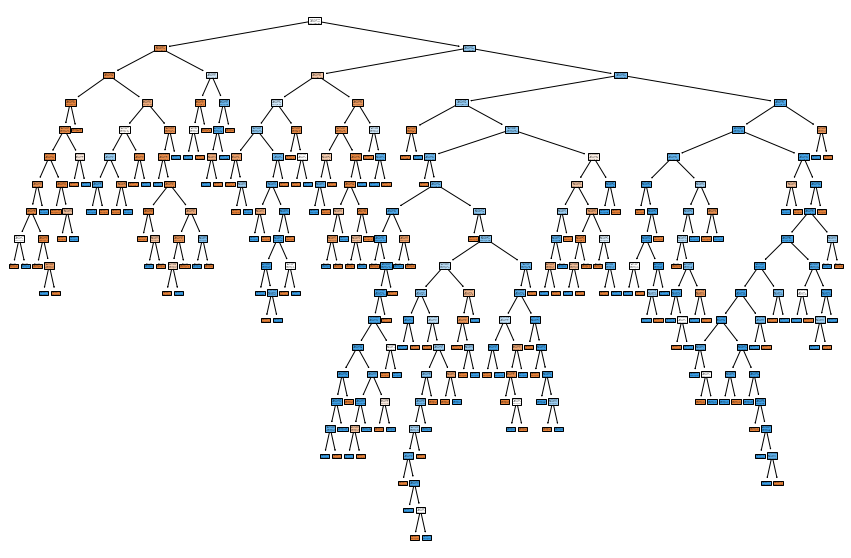

In [66]:
plt.figure(figsize=(15,10))
tree.plot_tree(dTree,filled=True)

Reducing Overfitting

In [67]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
dTreeR.fit(x_trainsc, y_os_train)
print(dTreeR.score(x_trainsc, y_os_train))
print(dTreeR.score(x_testsc, y_test))

DecisionTreeClassifier(max_depth=4, random_state=1)

0.8523316062176166
0.7895833333333333


In [68]:
dTreeR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state=1)
dTreeR.fit(x_trainsc, y_os_train)
print(dTreeR.score(x_trainsc, y_os_train))
print(dTreeR.score(x_testsc, y_test))

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

0.8466321243523316
0.75


0.75


<IPython.core.display.Javascript object>

<Figure size 504x360 with 0 Axes>

<AxesSubplot:>

Accuracy Score for Decision Tree:  0.75


Decision Tree Classifier Report


              precision    recall  f1-score   support

           0       0.97      0.74      0.84       417
           1       0.33      0.84      0.47        63

    accuracy                           0.75       480
   macro avg       0.65      0.79      0.65       480
weighted avg       0.88      0.75      0.79       480



ROC score:  0.7887404362224507


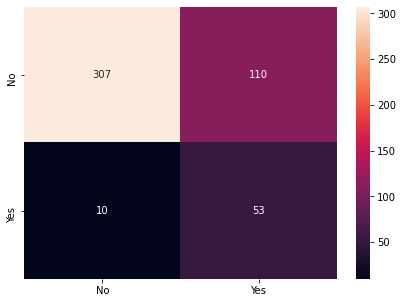

In [71]:
print(dTreeR.score(x_testsc , y_test))
y_predict = dTreeR.predict(x_testsc)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Saving the Classification Reports for Meta Learning Models:

pred_report_tree = classification_report(y_test, y_predict , digits=2)

### Saving the ROC_AUC Scores for Meta Learning Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_tree = auc(false_positive_rate, true_positive_rate)

## Saving the accuracy

accuracy = accuracy_score(y_test, y_predict)

print("Accuracy Score for Decision Tree: ",accuracy)
print("\n")
print("Decision Tree Classifier Report")
print("\n")
print(pred_report_tree)
print("\n")
print("ROC score: ",roc_tree)

Random Forest Classifier

In [72]:
rf_model        =      RandomForestClassifier(criterion = 'gini', 
                                              n_estimators = 100, random_state=1)

In [73]:
rf_model.fit(x_trainsc, y_os_train)

RandomForestClassifier(random_state=1)

In [74]:
y_predict     =   rf_model.predict(x_testsc)

In [75]:
## Saving the Classification Reports for Meta Learning Models:

pred_report_tree = classification_report(y_test, y_predict , digits=2)

### Saving the ROC_AUC Scores for Meta Learning Algorithms

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_tree = auc(false_positive_rate, true_positive_rate)

## Saving the accuracy

accuracy = accuracy_score(y_test, y_predict)

print("Accuracy Score for Random Forest: ",accuracy)
print("\n")
print("Random Forest Classifier Report")
print("\n")
print(pred_report_tree)
print("\n")
print("ROC score: ",roc_tree)

Accuracy Score for Random Forest:  0.9145833333333333


Random Forest Classifier Report


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       417
           1       0.65      0.75      0.70        63

    accuracy                           0.91       480
   macro avg       0.81      0.84      0.82       480
weighted avg       0.92      0.91      0.92       480



ROC score:  0.8430398538312208


Boosting Algorithm

In [76]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(x_trainsc, y_os_train)
y_pred = clf.predict(x_testsc)

AdaBoostClassifier(n_estimators=100)

In [78]:
########## Printing the Accuracy Score

print("Accuracy Score: ",accuracy_score(y_test, y_pred))


########## Printing the Classification Report

print(classification_report(y_test, y_pred, digits=2))

### Saving the ROC_AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_1 = auc(false_positive_rate, true_positive_rate)
print("roc_auc_1 score: ", roc_auc_1)

Accuracy Score:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       417
           1       0.41      0.65      0.51        63

    accuracy                           0.83       480
   macro avg       0.68      0.76      0.70       480
weighted avg       0.87      0.83      0.85       480

roc_auc_1 score:  0.755852460888432


Gradient Boosting

In [79]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(x_trainsc, y_os_train)
y_pred = clf.predict(x_testsc)

<IPython.core.display.Javascript object>

GradientBoostingClassifier()

In [80]:
########## Printing the Accuracy Score

print("Accuracy Score: ",accuracy_score(y_test, y_pred))


########## Printing the Classification Report

print(classification_report(y_test, y_pred, digits=2))

### Saving the ROC_AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_2 = auc(false_positive_rate, true_positive_rate)
print("roc_auc_2 score: ", roc_auc_2)

Accuracy Score:  0.8666666666666667
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       417
           1       0.49      0.70      0.58        63

    accuracy                           0.87       480
   macro avg       0.72      0.80      0.75       480
weighted avg       0.89      0.87      0.88       480

roc_auc_2 score:  0.7952495146739751


In [82]:
# Save the trained model as a pickle string.
saved_model = pickle.dumps(rf_model)

# Conclusion

From the above analysis we find that "Random Forest Classifier" seems to deem fit our predicting algorithm model. As wine is a consumer product so higher recall with better accuracy scores better.